#Thư viện cần thiết

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score, ConfusionMatrixDisplay, precision_score, recall_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.decomposition import PCA

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dir_srccode = "/content/drive/MyDrive/[DS102] ĐỒ ÁN/CUỐI KỲ/SOURCE CODE/"

# 1. Tiền xử lý dữ liệu

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/[DS102] ĐỒ ÁN/DATA/data.csv')

In [ ]:
print(data["diagnosis"].value_counts()) # Số lượng của từng nhãn

diagnosis
B    357
M    212
Name: count, dtype: int64


In [ ]:
data.head() # In ra 5 dòng đầu tiên của dữ liệu

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
data.isnull().sum() # Kiểm tra xem có thuộc tính nào của mẫu mang giá trị NULL không

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
def dropColumns(data, columns):
    data_cop = data.copy()
    data_cop = data_cop.drop(columns=columns)
    return data_cop

columns_to_drop = ["id", "Unnamed: 32"] # Xác định những cột không cần thiết để xóa khỏi dữ liệu
data = dropColumns(data, columns_to_drop)

In [ ]:
# Với giá trị nhãn là M (ác tính) -> 1 và B (lành tính ) -> 0
data["diagnosis"] = [1 if label=="M" else 0 for label in data["diagnosis"]]

In [ ]:
data.head() # In ra 5 dòng đầu tiên của dữ liệu sau khi thực hiện xóa các cột và chuyển đổi giá trị của nhãn

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
X = data.iloc[:, 1:31] # Dữ liệu đầu vào từ cột 2 ("radius_mean") -> cột 31 ("fractal_dimension_worst"))
y = data.iloc[:, 0] # Giá trị của cột 1 ("diagnosis") là nhãn

# Chia bộ dữ liệu thành 2 tập: 80% train và 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

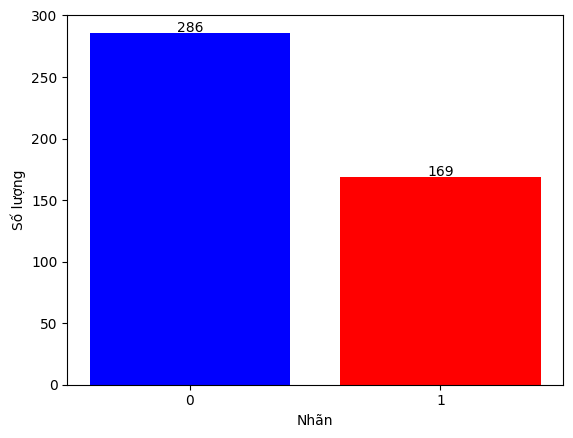

In [ ]:
# Hiển thị số lượng của mỗi nhãn trong dữ liệu huấn luyện
colors = ["blue", "red"]
unique_labels, counts = np.unique(y_train, return_counts=True)
plt.bar(unique_labels, counts, color=colors)
plt.xlabel("Nhãn")
plt.ylabel("Số lượng")
plt.xticks(unique_labels)
for i in range(len(unique_labels)):
    plt.text(x=i, y=counts[i] + 0.5, s=str(counts[i]), ha='center')
plt.savefig("/content/drive/MyDrive/[DS102] ĐỒ ÁN/CUỐI KỲ/SOURCE CODE/count_label.png")
plt.show()

In [ ]:
data_train =  pd.concat([X_train, y_train], axis=1)

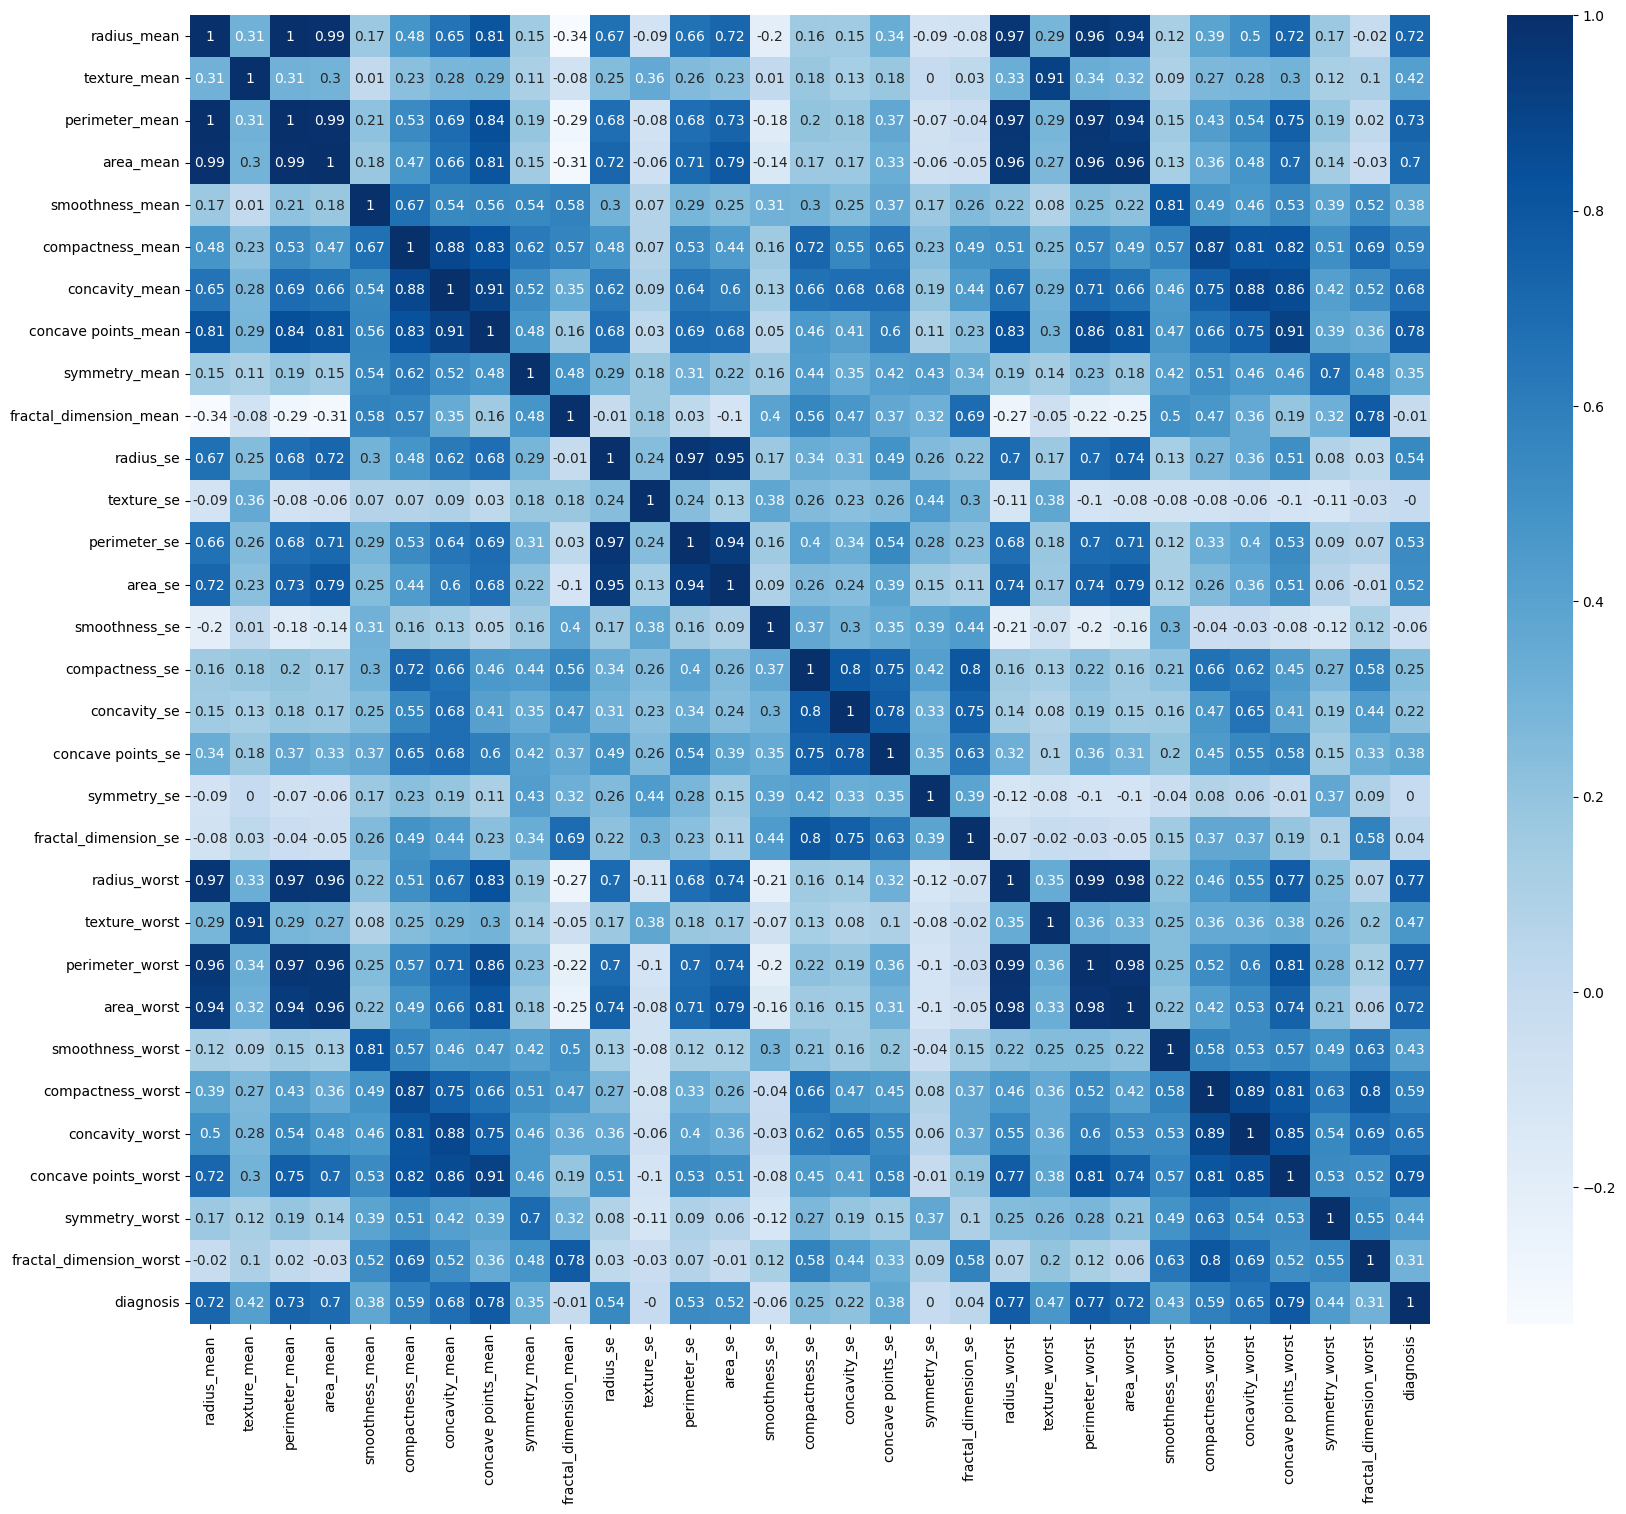

In [ ]:
# Hiển thị correlation matrix của dữ liệu train rồi lưu thành file
plt.figure(figsize=(20,17))
correlation_matrix = data_train.corr()
heatmap_corr = sns.heatmap(correlation_matrix.round(2), annot=True, cmap="Blues")
heatmap_corr.figure.savefig("/content/drive/MyDrive/[DS102] ĐỒ ÁN/CUỐI KỲ/SOURCE CODE/heatmap_correlationmatrix.png")

#2. Khám phá dữ liệu

## Tương quan giữa các thuộc tính với thuộc tính đích "diagnosis"

In [ ]:
# Tính giá trị tương quan giữa các thuộc tính với thuộc tính đích "diagnosis"
correlations = data_train.corr()['diagnosis'].drop('diagnosis')

# Sắp xếp các thuộc tính theo giá trị tương quan giảm dần
sorted_correlations = correlations.sort_values(ascending=False)

# In ra
print(sorted_correlations)

concave points_worst       0.788885
concave points_mean        0.778115
perimeter_worst            0.774998
radius_worst               0.766527
perimeter_mean             0.731859
area_worst                 0.722875
radius_mean                0.718073
area_mean                  0.695171
concavity_mean             0.683262
concavity_worst            0.649952
compactness_mean           0.590554
compactness_worst          0.588884
radius_se                  0.540126
perimeter_se               0.529211
area_se                    0.517064
texture_worst              0.467479
symmetry_worst             0.440323
smoothness_worst           0.430364
texture_mean               0.416213
concave points_se          0.380240
smoothness_mean            0.375137
symmetry_mean              0.348123
fractal_dimension_worst    0.312994
compactness_se             0.254370
concavity_se               0.216047
fractal_dimension_se       0.041727
symmetry_se                0.004723
texture_se                -0

## Trực quan hóa dữ liệu

### Pair Plot

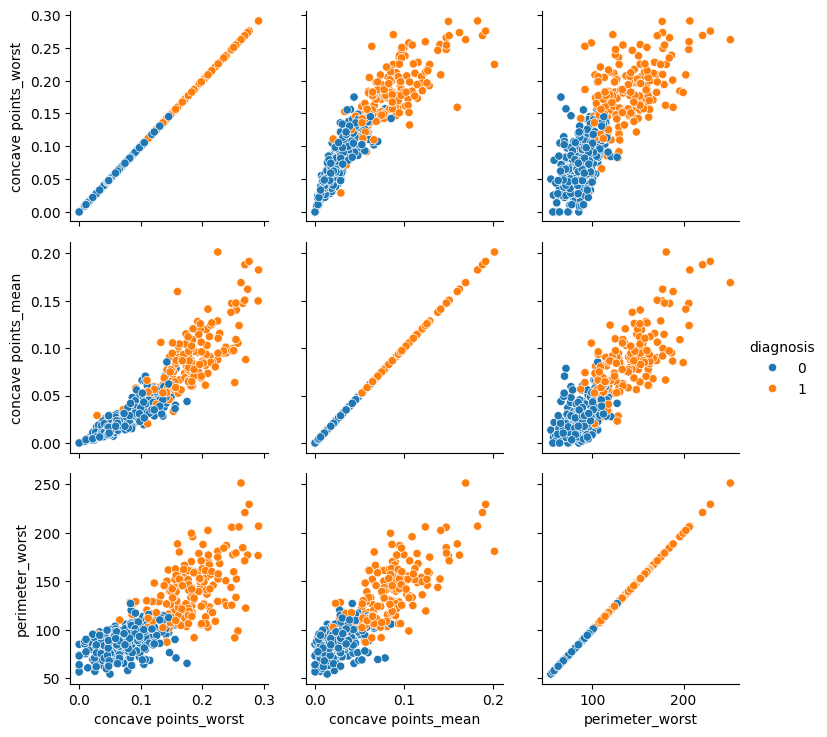

In [ ]:
# Tạo pairplot cho 3 thuộc tính có giá trị tương quan mạnh nhất với thuộc tính đích 'diagnosis' là 'concave points_worst', 'concave points_mean', 'perimeter_worst' và lưu thành file
g = sns.PairGrid(data_train, hue='diagnosis', vars=['concave points_worst', 'concave points_mean', 'perimeter_worst'])
g.map(sns.scatterplot)
g.add_legend()
plt.savefig("/content/drive/MyDrive/[DS102] ĐỒ ÁN/CUỐI KỲ/SOURCE CODE/pairplot.png")

# Hiển thị biểu đồ
plt.show()

###Distribution Plot

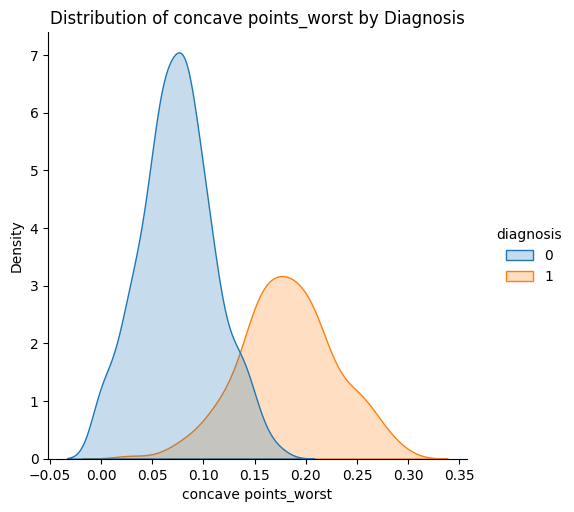

In [ ]:
#Tạo biểu đồ Distribution cho 'concave points_worst' và lưu lại file
sns.displot(data, x='concave points_worst', hue='diagnosis', kind='kde', fill=True)
plt.xlabel('concave points_worst')
plt.ylabel('Density')
plt.title('Distribution of concave points_worst by Diagnosis')
plt.savefig('/content/drive/MyDrive/[DS102] ĐỒ ÁN/CUỐI KỲ/SOURCE CODE/displot_concave points_worst.png')


plt.show()

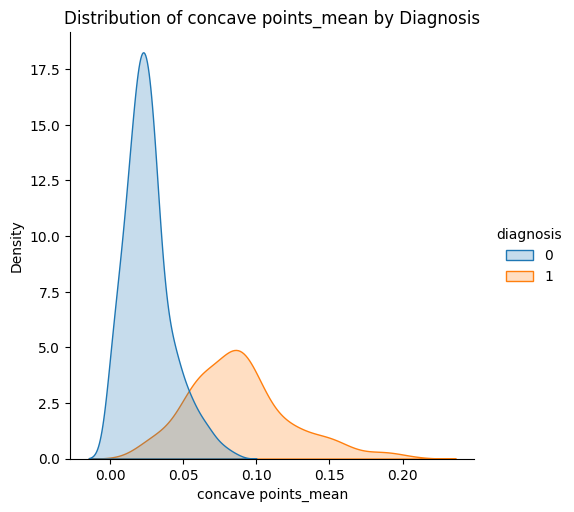

In [ ]:
#Tạo biểu đồ Distribution cho 'concave points_mean' và lưu lại file
sns.displot(data, x='concave points_mean', hue='diagnosis', kind='kde', fill=True)
plt.xlabel('concave points_mean')
plt.ylabel('Density')
plt.title('Distribution of concave points_mean by Diagnosis')
plt.savefig('/content/drive/MyDrive/[DS102] ĐỒ ÁN/CUỐI KỲ/SOURCE CODE/displot_concave points_mean.png')

plt.show()

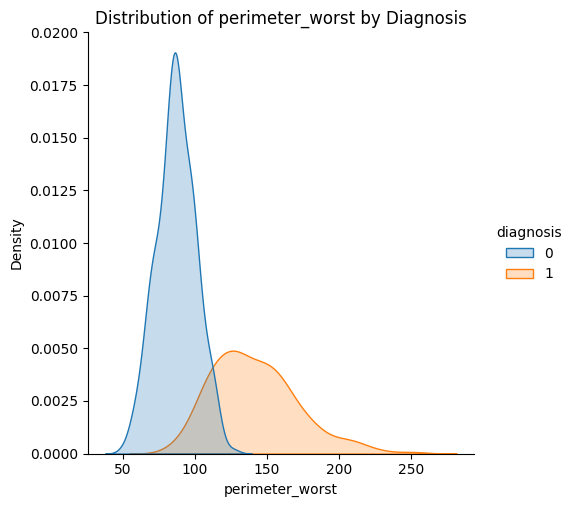

In [ ]:
#Tạo biểu đồ Distribution cho 'perimeter_worst' và lưu lại file
sns.displot(data, x='perimeter_worst', hue='diagnosis', kind='kde', fill=True)
plt.xlabel('perimeter_worst')
plt.ylabel('Density')
plt.title('Distribution of perimeter_worst by Diagnosis')
plt.savefig('/content/drive/MyDrive/[DS102] ĐỒ ÁN/CUỐI KỲ/SOURCE CODE/displot_perimeter_worst.png')

plt.show()

# 3. Huấn luyện và tinh chỉnh mô hình

In [ ]:
""" Hiển thị `Pipeline` đang sử dụng """
def make_interface(pipeline_name, length_of_name=100):
  print(length_of_name*'-')
  print("|", end="")
  print(pipeline_name.center(length_of_name-2), end="")
  print("|")
  print(length_of_name*'-')
  return

""" Thực hiện chiến lược chia cho việc cross-validate """
def cross_validate(num_folds=5):
  cv = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)
  return cv

""" Thực hiện GridSearchCV để tìm ra bộ trọng số tốt nhất trên Pipeline và tập các giá trị cho trước """
def train_model(pipelines, params, describes):
  cv = cross_validate()
  best_score = 0
  best_pipelines = []
  best_describes = []
  for (pl, pr, ds) in zip(pipelines, params, describes):
      make_interface(ds)
      gridsearch = GridSearchCV(estimator=pl, param_grid=pr, cv=cv)
      gridsearch.fit(X_train, y_train)
      print(f"Best params: {gridsearch.best_params_}")
      print(f"Best score: {gridsearch.best_score_}")
      print("\n")

      if gridsearch.best_score_ > best_score:
        best_score = gridsearch.best_score_

        best_pipelines.clear()
        best_describes.clear()

        best_pipelines.append(gridsearch)
        best_describes.append(ds)

      elif gridsearch.best_score_ == best_score:
        best_pipelines.append(gridsearch)
        best_describes.append(ds)

      else:
        continue

  print(f"Best pipeline: {best_describes}")
  return best_pipelines, best_describes

""" Kiểm tra xem đã huấn luyện các mô hình chưa?
Nếu rồi thì chỉ tải file lên, còn không thì huấn luyện và tinh chỉnh """
def dump_load_model(pipelines, params, describes, model_name):
  """ `model_name`: viết tắt của tên mô hình huấn luyện """
  if model_name not in ["LR", "SVM", "RF"]:
    raise ValueError("model_name must be one of ['LR', 'SVM', 'RF']")
    return

  models = []
  describe_pipelines = []

  dir_model = os.path.join(dir_srccode, f"{model_name}/")
  os.makedirs(dir_model, exist_ok=True)

  if len(os.listdir(dir_model)):
    print("Đã huấn luyện các file mô hình trước đó !!!")

    for filename in os.listdir(dir_model):
      with open(f"{dir_model}{filename}", "rb") as file:
        model = pickle.load(file)
      models.append(model)
      describe = (" " + filename.replace("_", " + ") + " ").replace(".pkl", "")
      describe_pipelines.append(describe)

    print("Tải lên các file thành công !!!")

  else:
    print("Thực hiện huấn luyện và tinh chỉnh mô hình !!!\n")

    models, describe_pipelines = train_model(pipelines, params, describes)

    for (model, describe) in zip(models, describe_pipelines):
      filename = describe.replace(" ", "").replace("+", "_")
      with open(f"{dir_model}{filename}.pkl", "wb") as file:
        pickle.dump(model, file)

    print("Lưu trữ các file thành công !!!")

  return models, describe_pipelines

def metric_value(y_true, y_pred):
  accuracy = accuracy_score(y_true, y_pred)
  precision = precision_score(y_true, y_pred)
  recall = recall_score(y_true, y_pred)
  f1 = f1_score(y_true, y_pred)
  return precision, recall, accuracy, f1

def show_confusion_matrix(y_true, y_pred, ds):
  cm = confusion_matrix(y_test, y_pred)
  display_cm = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benign", "Malignant"])
  display_cm.plot(cmap='Blues')
  plt.title(f'Confusion Matrix of {ds}')

## SVM

In [ ]:
svm_pipelines = [
    Pipeline([("svm_model_1", SVC(random_state=42))]),
    Pipeline([("svm_scaler_2", MinMaxScaler()), ("svm_model_2", SVC(random_state=42))]),
    Pipeline([("svm_pca_3", PCA()), ("svm_model_3", SVC(random_state=42))]),
    Pipeline([("svm_scaler_4", MinMaxScaler()), ("svm_pca_4", PCA()), ("svm_model_4", SVC(random_state=42))])
]

svm_params = [
    {
    "svm_model_1__max_iter": [500, 750, 1000, 1250, 1500, -1],
    "svm_model_1__tol": [1e-3, 1e-4, 1e-5],
    "svm_model_1__C": [0.01, 0.1, 1, 10, 100]
    },

    {
    "svm_model_2__max_iter": [500, 750, 1000, 1250, 1500, -1],
    "svm_model_2__tol": [1e-3, 1e-4, 1e-5],
    "svm_model_2__C": [0.01, 0.1, 1, 10, 100]
    },

    {
    "svm_pca_3__n_components": [i for i in range(1,31)],
    "svm_model_3__max_iter": [500, 750, 1000, 1250, 1500, -1],
    "svm_model_3__tol": [1e-3, 1e-4, 1e-5],
    "svm_model_3__C": [0.01, 0.1, 1, 10, 100]
    },

    {
    "svm_pca_4__n_components": [i for i in range(1,31)],
    "svm_model_4__max_iter": [500, 750, 1000, 1250, 1500, -1],
    "svm_model_4__tol": [1e-3, 1e-4, 1e-5],
    "svm_model_4__C": [0.01, 0.1, 1, 10, 100]
    },
]

svm_describes = ["SVM", "MinMaxScaler + SVM", "PCA + SVM", "MinMaxScaler + PCA + SVM"]

In [ ]:
svm_models, svm_describe_pipelines = dump_load_model(svm_pipelines, svm_params, svm_describes, "SVM")

Đã huấn luyện các file mô hình trước đó !!!
Tải lên các file thành công !!!


In [ ]:
for model in svm_models:
  print(model.best_params_)

{'svm_model_2__C': 1, 'svm_model_2__max_iter': 500, 'svm_model_2__tol': 0.001}
{'svm_model_4__C': 1, 'svm_model_4__max_iter': 500, 'svm_model_4__tol': 0.001, 'svm_pca_4__n_components': 15}


----------------------------------------------------------------------------------------------------
|                                        MinMaxScaler + SVM                                        |
----------------------------------------------------------------------------------------------------
Precision: 0.9761904761904762
Recall: 0.9534883720930233
Accuracy: 0.9736842105263158
F1-score: 0.9647058823529412
----------------------------------------------------------------------------------------------------
|                                     MinMaxScaler + PCA + SVM                                     |
----------------------------------------------------------------------------------------------------
Precision: 0.9761904761904762
Recall: 0.9534883720930233
Accuracy: 0.9736842105263158
F1-score: 0.9647058823529412


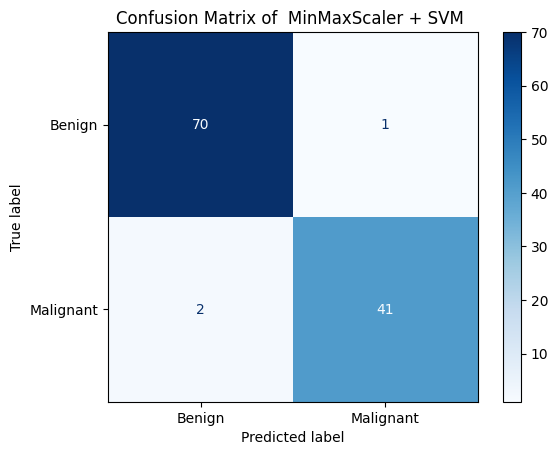

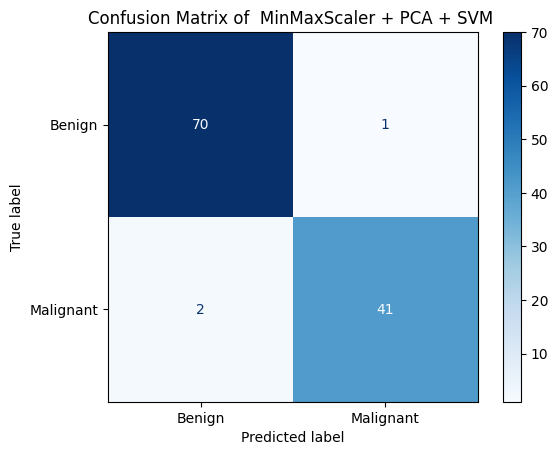

In [ ]:
for (svm_model, svm_describe) in zip(svm_models, svm_describe_pipelines):
  svm_y_pred = svm_model.predict(X_test)
  svm_precision, svm_recall, svm_accuracy, svm_f1 = metric_value(y_test, svm_y_pred)
  make_interface(svm_describe)
  print(f"Precision: {svm_precision}")
  print(f"Recall: {svm_recall}")
  print(f"Accuracy: {svm_accuracy}")
  print(f"F1-score: {svm_f1}")
  show_confusion_matrix(y_test, svm_y_pred, svm_describe)

##Random Forest

In [ ]:
rf_pipelines = [
    Pipeline([("rf_model_1", RandomForestClassifier(random_state=42))]),
    Pipeline([("rf_scaler_2", MinMaxScaler()), ("rf_model_2", RandomForestClassifier(random_state=42))]),
    Pipeline([("rf_pca_3", PCA()), ("rf_model_3", RandomForestClassifier(random_state=42))]),
    Pipeline([("rf_scaler_4", MinMaxScaler()), ("rf_pca_4", PCA()), ("rf_model_4", RandomForestClassifier(random_state=42))])
]

rf_params = [
    {
      "rf_model_1__n_estimators": [100, 200, 300],
      "rf_model_1__max_depth": [None, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    },

    {
      "rf_model_2__n_estimators": [100, 200, 300],
      "rf_model_2__max_depth": [None, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    },

    {
      "rf_pca_3__n_components": [i for i in range(1,31)],
      "rf_model_3__n_estimators": [100, 200, 300],
      "rf_model_3__max_depth": [None, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    },

    {
      "rf_pca_4__n_components": [i for i in range(1,31)],
      "rf_model_4__n_estimators": [100, 200, 300],
      "rf_model_4__max_depth": [None, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    },
]

rf_describes = ["RandomForest", "MinMaxScaler + RandomForest", "PCA + RandomForest", "MinMaxScaler + PCA + RandomForest"]

In [ ]:
rf_models, rf_describe_pipelines = dump_load_model(rf_pipelines, rf_params, rf_describes, "RF")

Đã huấn luyện các file mô hình trước đó !!!
Tải lên các file thành công !!!


In [ ]:
for model in rf_models:
  print(model.best_params_)

{'rf_model_1__max_depth': 7, 'rf_model_1__n_estimators': 100}
{'rf_model_2__max_depth': 7, 'rf_model_2__n_estimators': 100}


----------------------------------------------------------------------------------------------------
|                                           RandomForest                                           |
----------------------------------------------------------------------------------------------------
Precision: 0.975609756097561
Recall: 0.9302325581395349
Accuracy: 0.9649122807017544
F1-score: 0.9523809523809524
----------------------------------------------------------------------------------------------------
|                                   MinMaxScaler + RandomForest                                    |
----------------------------------------------------------------------------------------------------
Precision: 0.975609756097561
Recall: 0.9302325581395349
Accuracy: 0.9649122807017544
F1-score: 0.9523809523809524


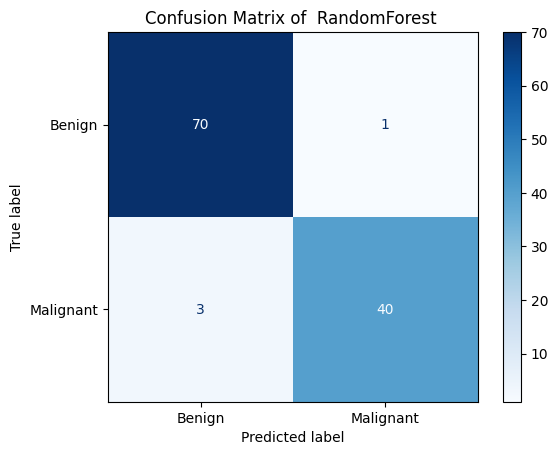

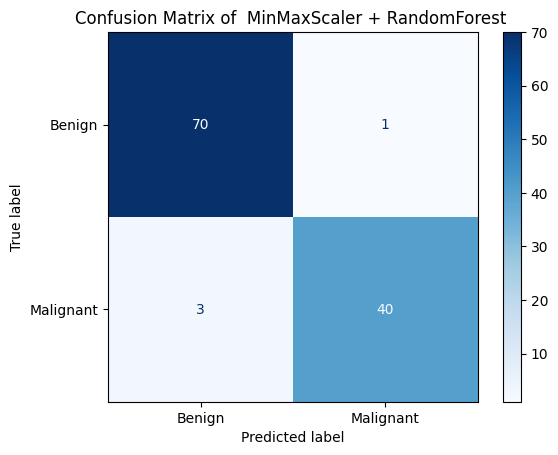

In [ ]:
for (rf_model, rf_describe) in zip(rf_models, rf_describe_pipelines):
  rf_y_pred = rf_model.predict(X_test)
  rf_precision, rf_recall, rf_accuracy, rf_f1 = metric_value(y_test, rf_y_pred)
  make_interface(rf_describe)
  print(f"Precision: {rf_precision}")
  print(f"Recall: {rf_recall}")
  print(f"Accuracy: {rf_accuracy}")
  print(f"F1-score: {rf_f1}")
  show_confusion_matrix(y_test, rf_y_pred, rf_describe)

## Logistic Regression

In [ ]:
lr_pipelines = [
    Pipeline([("lr_model_1", LogisticRegression(random_state=42))]),
    Pipeline([("lr_scaler_2", MinMaxScaler()), ("lr_model_2", LogisticRegression(random_state=42))]),
    Pipeline([("lr_pca_3", PCA()), ("lr_model_3", LogisticRegression(random_state=42))]),
    Pipeline([("lr_scaler_4", MinMaxScaler()), ("lr_pca_4", PCA()), ("lr_model_4", LogisticRegression(random_state=42))])
]

lr_params = [
    {
    "lr_model_1__max_iter": [500, 750, 1000, 1250, 1500],
    "lr_model_1__tol": [1e-3, 1e-4, 1e-5],
    "lr_model_1__C": [0.01, 0.1, 1, 10, 100]
    },

    {
    "lr_model_2__max_iter": [500, 750, 1000, 1250, 1500],
    "lr_model_2__tol": [1e-3, 1e-4, 1e-5],
    "lr_model_2__C": [0.01, 0.1, 1, 10, 100]
    },

    {
    "lr_pca_3__n_components": [i for i in range(1,31)],
    "lr_model_3__max_iter": [500, 750, 1000, 1250, 1500],
    "lr_model_3__tol": [1e-3, 1e-4, 1e-5],
    "lr_model_3__C": [0.01, 0.1, 1, 10, 100]
    },

    {
    "lr_pca_4__n_components": [i for i in range(1,31)],
    "lr_model_4__max_iter": [500, 750, 1000, 1250, 1500],
    "lr_model_4__tol": [1e-3, 1e-4, 1e-5],
    "lr_model_4__C": [0.01, 0.1, 1, 10, 100]
    },
]

lr_describes = ["LogisticRegression", "MinMaxScaler + LogisticRegression", "PCA + LogisticRegression", "MinMaxScaler + PCA + LogisticRegression"]

In [ ]:
lr_models, lr_describe_pipelines = dump_load_model(lr_pipelines, lr_params, lr_describes, "LR")

Đã huấn luyện các file mô hình trước đó !!!
Tải lên các file thành công !!!


In [ ]:
for model in lr_models:
  print(model.best_params_)

{'lr_model_2__C': 10, 'lr_model_2__max_iter': 500, 'lr_model_2__tol': 0.001}
{'lr_model_4__C': 10, 'lr_model_4__max_iter': 500, 'lr_model_4__tol': 0.001, 'lr_pca_4__n_components': 14}


----------------------------------------------------------------------------------------------------
|                                MinMaxScaler + LogisticRegression                                 |
----------------------------------------------------------------------------------------------------
Precision: 0.9761904761904762
Recall: 0.9534883720930233
Accuracy: 0.9736842105263158
F1-score: 0.9647058823529412
----------------------------------------------------------------------------------------------------
|                             MinMaxScaler + PCA + LogisticRegression                              |
----------------------------------------------------------------------------------------------------
Precision: 0.9761904761904762
Recall: 0.9534883720930233
Accuracy: 0.9736842105263158
F1-score: 0.9647058823529412


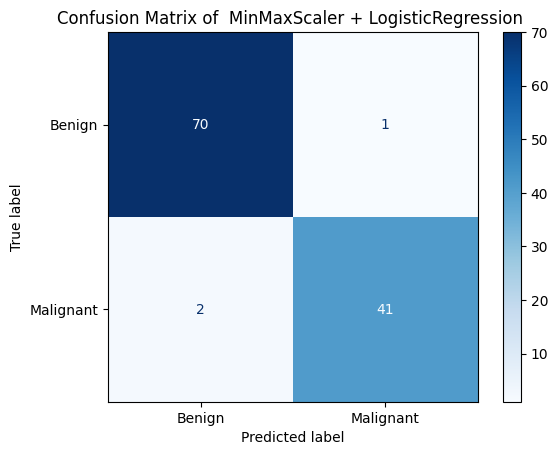

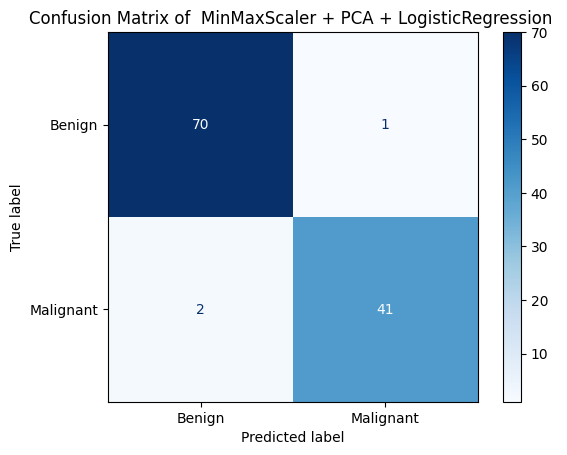

In [ ]:
for (lr_model, lr_describe) in zip(lr_models, lr_describe_pipelines):
  lr_y_pred = lr_model.predict(X_test)
  lr_precision, lr_recall, lr_accuracy, lr_f1 = metric_value(y_test, lr_y_pred)
  make_interface(lr_describe)
  print(f"Precision: {lr_precision}")
  print(f"Recall: {lr_recall}")
  print(f"Accuracy: {lr_accuracy}")
  print(f"F1-score: {lr_f1}")
  show_confusion_matrix(y_test, lr_y_pred, lr_describe)